# Informe de Machine Learning.
## Cuadernos con redes neuronales.
- Mauricio Munoz Gutierrez - 2123687
- Brayan Andres Sanchez Lozano - XXXXXXX
- Jose Luis Hincapie Bucheli - XXXXXXX

## Configuración básica para el trabajo.

In [1]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd
import sklearn
import warnings

In [2]:
#Obtenemos los datos del csv
datos = pd.read_csv("./breastCancer.csv")

In [3]:
#Vista rapida de los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   symmetry_mean            569 non-null    float64
 7   fractal_dimension_mean   569 non-null    float64
 8   radius_worst             569 non-null    float64
 9   texture_worst            569 non-null    float64
 10  perimeter_worst          569 non-null    float64
 11  area_worst               569 non-null    float64
 12  smoothness_worst         569 non-null    float64
 13  compactness_worst        569 non-null    float64
 14  symmetry_worst           5

## Separación de datos para entrenamiento y pruebas

In [4]:
from sklearn.model_selection import train_test_split 
N=len(datos)
#Datos de entrenamiento
cTrain=int(N*0.8)

#Datos de pruebas
cTest=N-cTrain

#Contar cantidad de datos
print(N,cTrain,cTest)

train_data,test_data= sklearn.model_selection.train_test_split(datos, train_size=cTrain, test_size=cTest)

569 455 114


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455 entries, 311 to 58
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              455 non-null    float64
 1   texture_mean             455 non-null    float64
 2   perimeter_mean           455 non-null    float64
 3   area_mean                455 non-null    float64
 4   smoothness_mean          455 non-null    float64
 5   compactness_mean         455 non-null    float64
 6   symmetry_mean            455 non-null    float64
 7   fractal_dimension_mean   455 non-null    float64
 8   radius_worst             455 non-null    float64
 9   texture_worst            455 non-null    float64
 10  perimeter_worst          455 non-null    float64
 11  area_worst               455 non-null    float64
 12  smoothness_worst         455 non-null    float64
 13  compactness_worst        455 non-null    float64
 14  symmetry_worst           455 n

## Pipeline para atributos.

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

num_attribs = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
               'compactness_mean','symmetry_mean','fractal_dimension_mean','radius_worst',
               'texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst',
               'symmetry_worst', 'fractal_dimension_worst']

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()) 
    ])

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs)])

In [7]:
x_train = full_pipeline.fit_transform(train_data)
y_train = train_data['diagnosis']

y_train

311    0
192    0
314    0
87     1
123    0
      ..
118    1
454    0
108    1
413    0
58     0
Name: diagnosis, Length: 455, dtype: int64

In [8]:
x_test = full_pipeline.transform(test_data)
y_test = test_data['diagnosis']

## Construcción de las redes neuronales.

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

### Red Neuronal 1

In [10]:
modelo1 = MLPClassifier(activation='relu',solver='lbfgs',hidden_layer_sizes=(2,3,5,7,11), random_state=123)
modelo1.fit(x_train, y_train)
scores1 = cross_val_score(modelo1, x_train, y_train, cv=5, scoring='accuracy')
print(scores1)
scores1.mean()

C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the

[0.93406593 0.94505495 0.93406593 0.95604396 0.92307692]


C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9384615384615385

In [11]:
y_pred1 = modelo1.predict(x_test)
accuracy_score(y_test, y_pred1)

0.956140350877193

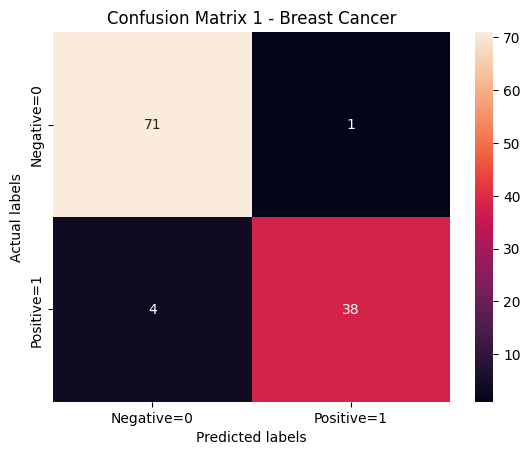

In [12]:
confusion_matrix1 = confusion_matrix(y_test, y_pred1)

ax = plt.subplot()
sns.heatmap(confusion_matrix1, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix 1 - Breast Cancer') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

### Red Neuronal 2

In [13]:
modelo2 = MLPClassifier(activation='relu',solver='adam',hidden_layer_sizes=(250,400), random_state=123)
modelo2.fit(x_train, y_train)
scores2 = cross_val_score(modelo2, x_train, y_train, cv=5, scoring='accuracy')
print(scores2)
scores2.mean()

C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Opti

[0.86813187 0.94505495 0.92307692 0.97802198 0.94505495]


C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9318681318681319

In [14]:
y_pred2 = modelo2.predict(x_test)
accuracy_score(y_test, y_pred2)

0.9649122807017544

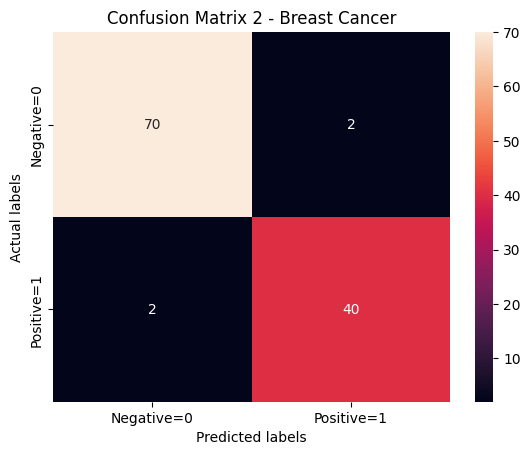

In [15]:
confusion_matrix2 = confusion_matrix(y_test, y_pred2)

ax = plt.subplot()
sns.heatmap(confusion_matrix2, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix 2 - Breast Cancer') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

### Red Neuronal 3

In [16]:
modelo3 = MLPClassifier(activation='logistic',solver='adam',hidden_layer_sizes=(15,10,3,8,7,10,9), random_state=123)
modelo3.fit(x_train, y_train)
scores3 = cross_val_score(modelo3, x_train, y_train, cv=5, scoring='accuracy')
print(scores3)
scores3.mean()

[0.62637363 0.62637363 0.62637363 0.62637363 0.62637363]


0.6263736263736264

In [17]:
y_pred3 = modelo3.predict(x_test)
accuracy_score(y_test, y_pred3)

0.631578947368421

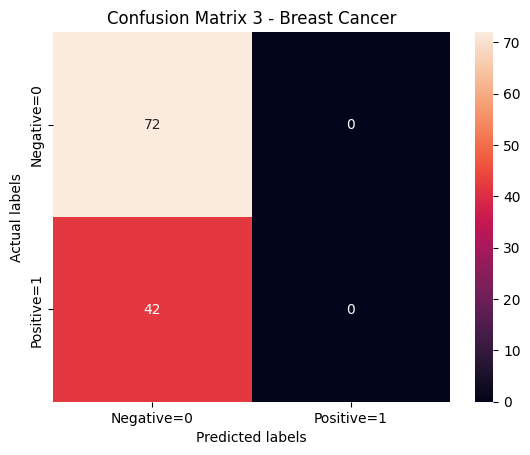

In [18]:
confusion_matrix3 = confusion_matrix(y_test, y_pred3)

ax = plt.subplot()
sns.heatmap(confusion_matrix3, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix 3 - Breast Cancer') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

### Red Neuronal 4

In [19]:
modelo4 = MLPClassifier(activation='identity',solver='sgd',hidden_layer_sizes=(150,25,35,10,50), random_state=123)
modelo4.fit(x_train, y_train)
scores4 = cross_val_score(modelo4, x_train, y_train, cv=5, scoring='accuracy')
print(scores4)
scores4.mean()

C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Opti

[0.92307692 0.93406593 0.93406593 0.95604396 0.92307692]


C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9340659340659341

In [20]:
y_pred4 = modelo4.predict(x_test)
accuracy_score(y_test, y_pred4)

0.956140350877193

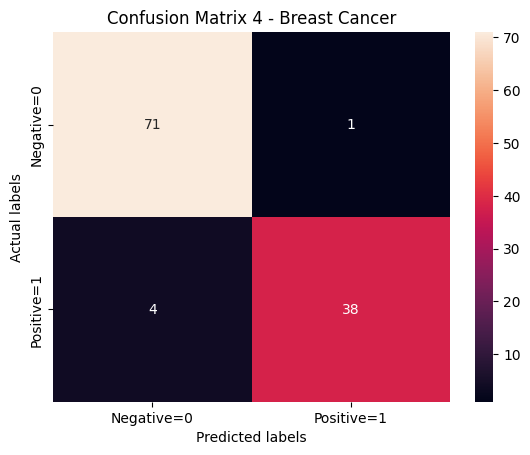

In [21]:
confusion_matrix4 = confusion_matrix(y_test, y_pred4)

ax = plt.subplot()
sns.heatmap(confusion_matrix4, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix 4 - Breast Cancer') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

### Red Neuronal 5

In [22]:
modelo5 = MLPClassifier(activation='tanh',solver='adam',hidden_layer_sizes=(6,2,2,1,7,12,6,3,9,4), random_state=123)
modelo5.fit(x_train, y_train)
scores5 = cross_val_score(modelo5, x_train, y_train, cv=5, scoring='accuracy')
print(scores5)
scores5.mean()

C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Opti

[0.89010989 0.94505495 0.91208791 0.96703297 0.93406593]


C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9296703296703297

In [23]:
y_pred5 = modelo5.predict(x_test)
accuracy_score(y_test, y_pred5)

0.9385964912280702

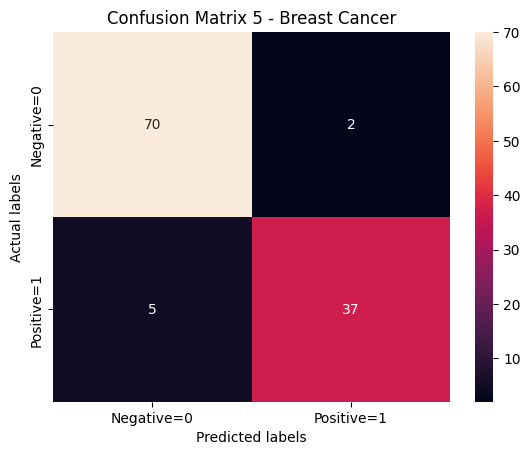

In [24]:
confusion_matrix5 = confusion_matrix(y_test, y_pred5)

ax = plt.subplot()
sns.heatmap(confusion_matrix5, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix 5 - Breast Cancer') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

### Resumen de las redes  

| Red Neuronal    | Func. Activacion | Solver | Capas Ocultas | Accuracy           |
| --------------- | ---------------- | ------ | ------------- | ------------------ |
| Red 1           | relu             | lbfgs  |  (2,3,5,7,11)        | 0.956140350877193 |
| Red 2           | relu             | adam   |  (250,400)    | 0.9649122807017544 |
| Red 3           | logistic             | adam   |  (15,10,3,8,7,10,9)      | 0.631578947368421 |
| Red 4           | identity         | sgd    |  (150,25,35,10,50)     | 0.956140350877193 |
| Red 5           | tanh             | adam   |  (6,2,2,1,7,12,6,3,9,4)     | 0.9385964912280702|

La red con mejor precisión obtenida es la red neuronal 2.

## Haciendo variaciones a la red de mejor precisión.

El hiperparámetro a modificar es beta_1:

### Variación 1: Beta_1 = 0.75

In [52]:
modeloV1 = MLPClassifier(activation='relu',solver='adam',hidden_layer_sizes=(250,400), random_state=123,beta_1=0.75)
modeloV1.fit(x_train, y_train)
scoresV1 = cross_val_score(modeloV1, x_train, y_train, cv=5, scoring='accuracy')
print(scoresV1)
scoresV1.mean()

C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Opti

[0.86813187 0.95604396 0.91208791 0.97802198 0.93406593]


C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9296703296703297

In [53]:
y_predV1 = modeloV1.predict(x_test)
accuracy_score(y_test, y_predV1)

0.9649122807017544

### Variación 2: Beta_1:0.2

In [54]:
modeloV2 = MLPClassifier(activation='relu',solver='adam',hidden_layer_sizes=(250,400), random_state=123,beta_1=0.2)
modeloV2.fit(x_train, y_train)
scoresV2 = cross_val_score(modeloV2, x_train, y_train, cv=5, scoring='accuracy')
print(scoresV2)
scoresV2.mean()

C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.86813187 0.95604396 0.92307692 0.97802198 0.92307692]


C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9296703296703297

In [55]:
y_predV2 = modeloV2.predict(x_test)
accuracy_score(y_test, y_predV2)

0.956140350877193

Tabla de resultados.

| Red Neuronal    | Func. Activacion | Solver | Capas Ocultas |beta_1| Accuracy           |
| --------------- | ---------------- | ------ | ------------- | -- |--------------- |
| Red 2           | relu             | adam   | (250,400)     | default(0.9)   | 0.9649122807017544  |
| Red Variacion 1 | relu             | adam   | (250,400)     | 0.75   | 0.9649122807017544 |
| Red Variacion 2 | relu             | adam   | (250,400)     | 0.2   | 0.956140350877193 |

El hiperparámetro que se ha variado es beta_1, el cuál por defecto se mantiene en 0.9 y solo tiene uso cuando el solver usado es adam. Se puede observar entonces para un valor de beta_1 igual a 0.75 (caso de la variación 1) el valor de la presición se mantuvo igual, mientras que para un valor más bajo como lo es 0.2 (caso de la variación 2) el valor de la presición disminuyó.